###### 03 Geometric Machine Learning for Shape Analysis

## D) Unsupervised Learning: Clustering

$\color{#003660}{\text{Nina Miolane - Assistant Professor}}$ @ BioShape Lab @ UCSB ECE


<center><img src="figs/03_kmeans_intro.png" width=650px alt="default"/></center>

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - **D) Unsupervised Learning: Clustering**
    - Motivation: Clustering of optic nerve heads
    - Tangent Machine Learning: Tangent Clustering
    - Geometric Machine Learning: Riemannian K-means
    - Geometric Machine Learning: Riemannian mean-shift
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.


# Overview of Machine Learning (ML)

Machine Learning is divided into two principal categories of algorithms: supervised and unsupervised learning algorithms. Both learn from data.

$\color{#EF5645}{\text{Definition}}$: **Unsupervised learning** refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the model is:
- a clustering: if we want to find groups (clusters),
- a dimension reduction: if we want to find the main sources of variations.



# Clustering



$\color{#EF5645}{\text{Given}}$:
- dataset $X_1, . . . , X_n$, 
- integer $k$,

$\color{#EF5645}{\text{Goal (Intuition)}}$:
  - Partition/Group/Cluster $n$ points into $k$ groups/clusters...
  - ... such that: points in the same group are "close".


<center><img src="figs/03_clustering.jpg" width=450px alt="default"/></center>
<center>Inputs: $X_1, ..., X_n \in \mathbb{R}^2$.</center>


# Motivation: Clustering of Optical Nerve Heads

$\color{#EF5645}{\text{Question}}$: Are the shapes of optic nerve heads split into two clusters: healthy versus glaucoma?

Data acquired with a Heidelberg Retina Tomograph - Patrangenaru and Ellingson (2015):
- 11 Rhesus monkeys
- 22 images of monkeys’ eyes:
  - an experimental glaucoma was introduced in one eye, 
  - while the second eye was kept as control.
  
$\rightarrow$ On each image, 3 anatomical "landmarks" were recorded, e.g. "superior aspect of the retina".

<center><img src="figs/01_optic_nerves.png" width=400px alt="default"/></center>
<center>Comparison of optic nerve heads in monkeys with and without glaucoma.</center>

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches

import warnings
warnings.filterwarnings("ignore")

In [33]:
import geomstats.datasets.utils as data_utils

nerves, labels, monkeys = data_utils.load_optical_nerves()
landmarks = [2, 3, 4]
nerves = nerves[:, landmarks, :]
print(nerves.shape)
print(labels)
print(monkeys)

(22, 3, 3)
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[ 0  0  1  1  2  2  3  3  4  4  5  5  6  6  7  7  8  8  9  9 10 10]


Plot two optical shapes: 

In [34]:
two_nerves = nerves[monkeys == 0]
print(two_nerves.shape)

two_labels = labels[monkeys == 0]
print(two_labels)

(2, 3, 3)
[0 1]


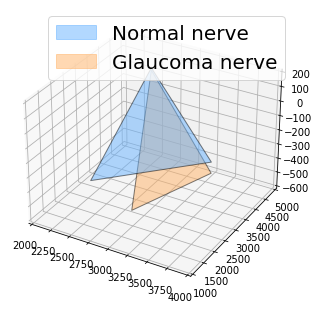

In [35]:
label_to_str = {0: "Normal nerve", 1: "Glaucoma nerve"}
label_to_color = {
    0: (102 / 255, 178 / 255, 255 / 255, 1.0),
    1: (255 / 255, 178 / 255, 102 / 255, 1.0),
}

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlim((2000, 4000))
ax.set_ylim((1000, 5000))
ax.set_zlim((-600, 200))

for nerve, label in zip(two_nerves, two_labels):
    x = nerve[:, 0]
    y = nerve[:, 1]
    z = nerve[:, 2]

    verts = [list(zip(x, y, z))]

    poly = Poly3DCollection(verts, alpha=0.5)
    color = label_to_color[int(label)]
    poly.set_color(colors.rgb2hex(color))
    poly.set_edgecolor("k")
    ax.add_collection3d(poly)

patch_0 = mpatches.Patch(color=label_to_color[0], label=label_to_str[0], alpha=0.5)
patch_1 = mpatches.Patch(color=label_to_color[1], label=label_to_str[1], alpha=0.5)
plt.legend(handles=[patch_0, patch_1], prop={"size": 20})
plt.show()

## Clustering Method 1: Tangent Machine Learning

### Recall: "Trick": Tangent Space at the Fréchet Mean

The Fréchet mean gives us a way of transforming our non-linear data into vectors!
1. Compute the Fréchet mean $\bar{x}$ of the data points
2. Consider the tangent space $T_\bar{x}M$of the manifold $M$ at $\bar{x}$
3. Compute the Logarithms of the data points at $\bar{x}$

$\rightarrow$ Get a dataset on a vector space, and apply classical machine learning on it.

$\color{#EF5645}{\text{Remark}}$: Since we have seen Tangent Machine Learning in the previous 2 subsections, we will skip it for clustering.

## Clustering Method 2: Riemannian K-Means

- Review K-Means
- Introduce Riemannian K-Means

# Traditional K-Means

- $\color{#EF5645}{\text{Notations}}$:
  - Group $G_j$ for $j=1, ..., k$: 
    - Set of indices in $1, ..., N$ representing which vectors belong to the group.
  - Assignment $c_i$ for $i=1,...,N$: Group that $x_i$ is in: $i \in G_{c_i}$
  - Group representative $z_j$ for $j=1, ..., k$: 
    - vector that represents a typical element of the group $G_j$.

- $\color{#EF5645}{\text{Goal}}$: Find $c_i$ and $z_j$ to minimize $J^{clust} = \frac{1}{N}\sum_{i=1}^N ||x_i - z_{c_i}||^2$
, i.e. the mean square distance from vectors to their representatives.


# K-Means


- Alternate between:
  - (i) update the groups, i.e the group assignments $c_1, ..., c_N$, 
  - (ii) update the representatives $z_1, ..., z_k$.
  
- Such that the objective $J^{clust}$ decreases at each step.

# (i) Update the groups

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign vectors to groups, i.e. choose $c_1, ..., c_N$
  - We assign each vector to its nearest representative. Justification:
    - Observe: $c_i$ only appears in term $||x_i - z_{c_i}||^2$ in $J^{clust}$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $‖x_i − z_{c_i} ‖^2 = min_{j \in \{1, ..., k\}} ‖x_i − z_j ‖^2$.

# (ii) Update the representatives

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = mean of the points in group $j$. Justification:
    - Observe: $J^{clust}$ splits into a sum of $k$ sums: 
$$J^{clust} = J_1 + · · · + J_k, \quad J_j = \frac{1}{N} \sum_{i \in G_j} ‖x_i − z_j ‖^2.$$
    - Conclude: Choose $z_j$ to minimize its $J_j$: $z_j = \frac{1}{|G_j|} \sum_{i \in G_j} x_i$ = mean/center/centroid.

<center><img src="figs/03_kmeans.jpg" alt="default"/></center>


# Convergence of K-Means

- How many times do we iterate these steps?
  - Until the $z_j$’s stop changing: "convergence" of the algorithm.
- $\color{#EF5645}{\text{Remarks}}$:
  - $J^{clust}$ decreases at each step, 
  - but in general we don't find partition that minimizes $J^{clust}$,
  - the final partition depends on initial representatives.

- $\color{#EF5645}{\text{Recommendation}}$:
  - Run $k$-means 10 times, with different initial representatives
  - Take as final partition the one with smallest $J^{clust}$

<center><img src="figs/03_it0.png" alt="default"/></center>

<center><img src="figs/03_it1.png" alt="default"/></center>

<center><img src="figs/03_it2.png" alt="default"/></center>

<center><img src="figs/03_it3.png" alt="default"/></center>

<center><img src="figs/03_it4.png" alt="default"/></center>

<center><img src="figs/03_it5.png" alt="default"/></center>

<center><img src="figs/03_conv.png" alt="default"/></center>

# From K-Means to Riemannian K-Means

- Replace squared Euclidean distance by squared geodesic distance
- Replace computation of mean by FrechetMean

# Riemannian K-Means

- $\color{#EF5645}{\text{Notations}}$:
  - Group $G_j$ for $j=1, ..., k$: Set of indices in $1, ..., N$ representing which points belong to the group.
  - Assignment $c_i$ for $i=1,...,k$: Group that $x_i$ is in: $i \in G_{c_i}$
  - Group representative $z_j$ for $j=1, ..., k$: point that represents a typical element of the group $G_j$.

- $\color{#EF5645}{\text{Goal}}$: Find $c_i$ and $z_j$ to minimize $J^{clust} = \frac{1}{N}\sum_{i=1}^N \color{#EF5645}{d(x_i, z_{c_i})}^2$
, i.e. the mean geodesic square distance from points to their representatives.


# (i) Update the groups

- Given: representatives $z_1, ..., z_k$
- $\color{#EF5645}{\text{Goal for (i)}}$: Assign points to groups, i.e. choose $c_1, ..., c_N$
  - We assign each point to its nearest representative. Justification:
    - Observe: $c_i$ only appears in term $\color{#EF5645}{d(x_i, z_{c_i})}^2$ in $J^{clust}$
    - Conclude: to minimize over $c_i$, choose $c_i$ so $\color{#EF5645}{d(x_i, z_{c_i} )}^2 = min_{j \in \{1, ..., k\}} \color{#EF5645}{d(x_i, z_j )}^2$.

# (ii) Update the representatives

- Given the partition $G_1, . . . , G_k$
- $\color{#EF5645}{\text{Goal for (ii)}}$: Choose representatives $z_1, . . . , z_k$
  - Choose $z_j$ = Frechet mean of the points in group $j$. Justification:
    - Observe: $J^{clust}$ splits into a sum of $k$ sums: 
$$J^{clust} = J_1 + · · · + J_k, \quad J_j = \frac{1}{N} \sum_{i \in G_j} d(x_i, z_j)^2.$$
    - Conclude: Choose $z_j$ to minimize its $J_j$: $z_j$  $\color{#EF5645}{\text{Frechet mean/center/centroid.}}$

## Example: On the Sphere

In [36]:
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as viz
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.geometry.special_orthogonal import SpecialOrthogonal

Generate synthetic data on the sphere.

In [60]:
from sklearn.model_selection import train_test_split

sphere = Hypersphere(dim=2)
cluster = sphere.random_von_mises_fisher(kappa=20, n_samples=140)

SO3 = SpecialOrthogonal(3)
rotation1 = SO3.random_uniform()
rotation2 = SO3.random_uniform()

cluster_1 = cluster @ rotation1
cluster_2 = cluster @ rotation2

data = np.concatenate((cluster_1, cluster_2), axis=0)

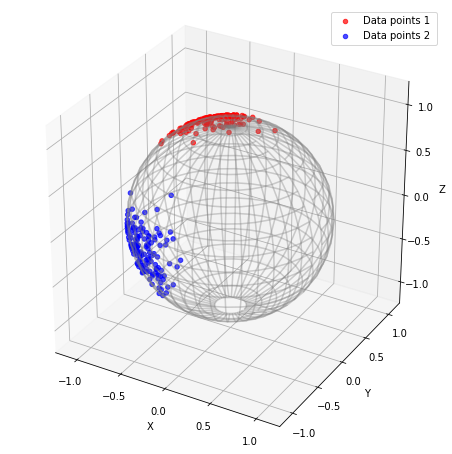

In [61]:
fig = plt.figure(figsize=(8, 8))
ax = viz.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = viz.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()
plt.show();

1. Set-up

- $\color{#EF5645}{\text{Decide on the model:}}$ We use Riemannian KMeans
- $\color{#EF5645}{\text{Decide on a loss function:}}$ $J^{\text{clust}}$

In [42]:
from geomstats.learning.kmeans import RiemannianKMeans

kmeans = RiemannianKMeans(sphere.metric, 2, tol=1e-3, init_step_size=1.0)

2. $\color{#EF5645}{\text{Split dataset into train / test sets:}}$ 
   - Train $X_1, ..., X_{n_\text{train}}$: build the algorithm
   - Test $X_{n_\text{train}+1}, ..., X_n$: assess its performances.

In [62]:
train, test = train_test_split(data)

3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm

In [45]:
centroids = kmeans.fit(train)
sphere.belongs(centroids)

array([ True,  True])

4. $\color{#EF5645}{\text{Test:}}$ Assess its performances

In [46]:
predicted_labels = kmeans.predict(test)
predicted_labels

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1])

Plot the results:

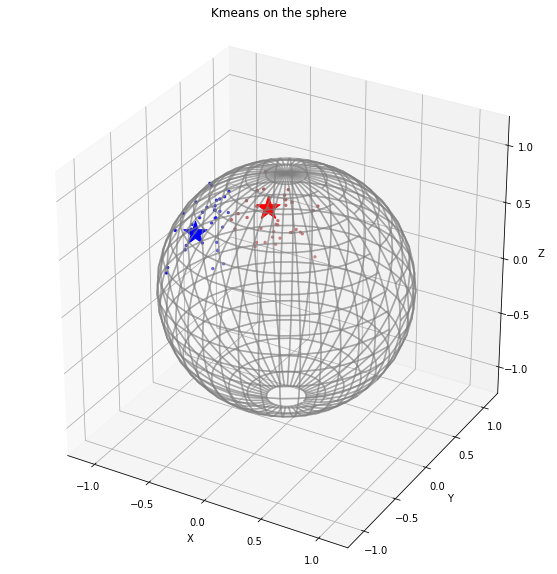

In [47]:
fig = plt.figure(figsize=(10, 10))
my_colors = ["red", "blue"]

ax = viz.plot(test, space="S2", marker=".", color="grey")

for i in range(2):
    ax = viz.plot(
        points=test[predicted_labels == i], ax=ax, space="S2", marker=".", color=my_colors[i]
    )

for i, c in enumerate(centroids):
    ax = viz.plot(c, ax=ax, space="S2", marker="*", s=600, color=my_colors[i])

ax.set_title("Kmeans on the sphere")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
plt.show()

## Example: On Optical Nerve Heads

In [49]:
from geomstats.geometry.pre_shape import PreShapeSpace, KendallShapeMetric

manifold = PreShapeSpace(k_landmarks=3, m_ambient=3)
metric = KendallShapeMetric(k_landmarks=3, m_ambient=3)
nerves = manifold.projection(nerves)

kmeans = RiemannianKMeans(
    metric, n_clusters=2, tol=1e-3, init_step_size=1.0)
centroids = kmeans.fit(nerves)

In [50]:
centroids.shape

(2, 3, 3)

In [51]:
predicted_labels = kmeans.predict(nerves)

In [53]:
np.sum(predicted_labels != labels) / len(labels)

0.45454545454545453

Recall our question.

$\color{#EF5645}{\text{Question}}$: Are the shapes of optic nerve heads split into two clusters (glaucoma and healthy)?

No, we are not able to find clusters. This is expected from previous lectures, where we could not visually see clusters.

## Clustering Method 3: Riemannian MeanShift

- Review Traditional Meanshit
- Introduce Riemannian Meanshift


### Traditional MeanShift


$\color{#EF5645}{\text{Mean-shift}}$ locates maxima of a density functions given discrete data samples from this function.

$\color{#6D7D33}{\text{Mean-shift clustering: Method overview}}$ Given a kernel function $K$, typically an inversw of a notion of distance.
- Start with initial centroids $x$,
- Determine the weights of points $x_i \in N(x)$ in neighborhood $N(x)$,
- Estimate the weighted mean: 
$$m(x) = \frac{\sum_{x_i \in N(x)} K(x_i - x)x_i}{\sum_{x_i \in N(x)} K(x_i - x)}.$$
- Shift to the mean $m(x)$ and iterate.

<center><img src="figs/03_meanshift.png" width=800px alt="default"/></center>

![](https://miro.medium.com/max/864/1*vyz94J_76dsVToaa4VG1Zg.gif)

### Riemannian MeanShift


$\color{#EF5645}{\text{Mean-shift}}$ locates maxima of a density functions given discrete data samples from this function.

$\color{#6D7D33}{\text{Mean-shift clustering: Method overview}}$ Given a kernel function $K$, typically a notion of inverse of $\color{#EF5645}{\text{geodesic distance}}$ .
- Start with initial centroids $x$,
- Determine the weights of points $x_i \in N(x)$ in neighborhood $N(x)$,
- Estimate the weighted $\color{#EF5645}{\text{Frechet mean}}$
$$m(x) = \text{argmin}_m \sum_{x_i \in N(x)} \frac{K(x_i, x) d_M(m, x_i)^2}{\sum_{x_i \in N(x)} K(x_i, x)}.$$
- Shift to the mean $m(x)$ and iterate.

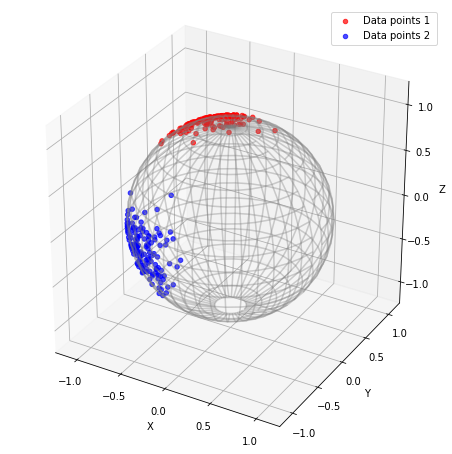

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = viz.plot(
    cluster_1, space="S2", color="red", alpha=0.7, label="Data points 1 "
)
ax = viz.plot(
    cluster_2, space="S2", ax=ax, color="blue", alpha=0.7, label="Data points 2"
)
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
ax.legend()
plt.show();

1. Set-up

- $\color{#EF5645}{\text{Decide on the model:}}$ We use Riemannian meanshift

In [64]:
from geomstats.learning.riemannian_mean_shift import RiemannianMeanShift

rms = RiemannianMeanShift(
    manifold=sphere,
    metric=sphere.metric,
    bandwidth=0.3,
    tol=1e-4,
    n_centers=20,
    init_centers="from_points",
)

3. $\color{#EF5645}{\text{Train:}}$ Build the algorithm

In [65]:
rms.fit(train)

In [66]:
print(rms.centers.shape)

(20, 3)


In [67]:
print(sphere.belongs(rms.centers))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]


4. $\color{#EF5645}{\text{Test:}}$ Assess its performances

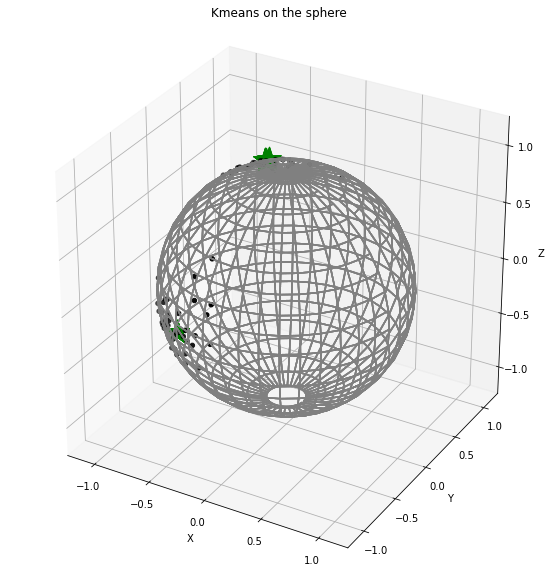

In [68]:
fig = plt.figure(figsize=(10, 10))
my_colors = ["red", "blue"]

ax = viz.plot(test, space="S2", marker=".", color="grey")

ax = viz.plot(
    points=test, ax=ax, space="S2", marker=".", s=80, color="black")

for i, c in enumerate(rms.centers):
    ax = viz.plot(c, ax=ax, space="S2", marker="*", s=600, color="green")

ax.set_title("Kmeans on the sphere")
ax.auto_scale_xyz([-1, 1], [-1, 1], [-1, 1])
plt.show()

# This Unit

- **Unit 1 (Geometry - Math!)**: Differential Geometry for Engineers
- **Unit 2 (Shapes)**: Computational Representations of Biomedical Shapes
- **Unit 3 (Machine Learning)**: **Geometric Machine Learning for Shape Analysis**
  - A) Mean and Covariance
  - B) Supervised Learning: Classification
  - C) Supervised Learning: Regression
  - **D) Unsupervised Learning: Clustering**
    - Motivation: Clustering of optic nerve heads
    - Tangent Machine Learning: Tangent Clustering
    - Geometric Machine Learning: Riemannian K-means
    - Geometric Machine Learning: Riemannian mean-shift
  - E) Unsupervised Learning: Dimension Reduction
- **Unit 4 (Deep Learning)**: Geometric Deep Learning for Shape Analysis

$\rightarrow$ We explain the machine learning algorithms and statistics used in these real-world scenarios.
